### 1. Problem Statement

### The client is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. 

### The goal of this case study is to analyze the spending patterns of customers to identify the factors that influence it and to give recommendations based on the insights uncovered. The dataset includes purchase details of customers on Black Friday. 

In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the dataset and creating a Pandas DataFrame
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [70]:
#Printing the first 5 rows of the DataFrame
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### 1.1 Primary Analysis

In [5]:
df.shape

(550068, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


### 1. The dataset has 550068 rows and 10 columns
### 2. 5 columns are of integer data type and 5 of object data type
### 3. There are no missing values in any of the columns
### 4. The statistical analysis gives the following insights about the customers
###     4.1 The purchase amount has a mean value of 9263 dollars and 75% of amounts lie below 12054 dollars
###     4.2 Occupation has been masked with 21 categories from 0 to 20.
###     4.3 Product_Category has been masked with 20 categories from 1 to 20.

### 1.2 Non Graphical Analysis

In [8]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [9]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [10]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [11]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [12]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [13]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [14]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [15]:
#Summarizing the number of unique values in each column
unique_counts=pd.DataFrame.from_records([(col,df[col].nunique()) for col in df.columns],columns=['Column_Name','Num_Unique'])
unique_counts.sort_values(by='Num_Unique')

,Column_Name,Num_Unique
2,Gender,2
7,Marital_Status,2
5,City_Category,3
6,Stay_In_Current_City_Years,5
3,Age,7
8,Product_Category,20
4,Occupation,21
1,Product_ID,3631
0,User_ID,5891
9,Purchase,18105


### 1. Based on the summary of unique values, all the columns except Product_ID, User_ID and Purchase can be considered as categorical
### 2. Ages from 0 to 55+ have been categorized into 7 different bins 
### 3. The dataset includes Male and Female customers, both Married and Single
### 4. There are 5891 unique customers in the dataset and 3631 unique products

In [16]:
#Converting columns to category datatype to reduce memory usage
cols_exc=['Product_ID','User_ID','Purchase']
for i in df.columns:
    if i not in cols_exc:
        df[i]=df[i].astype('category')

In [17]:
#Checking the reduction in memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


The memory usage has been reduced from 42MB to 16.3MB

### 1.3 Visual Analysis

### Univariate Analysis

### 1. Gender

In [18]:
a=round(df.groupby('Gender')["User_ID"].nunique()/df['User_ID'].nunique()*100,2)
a

Gender
F    28.28
M    71.72
Name: User_ID, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='User_ID'>

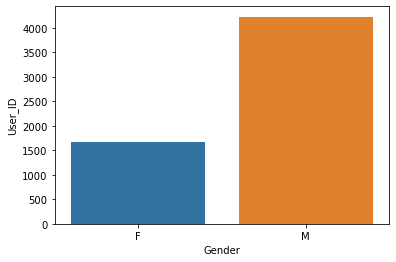

In [19]:
a=df.groupby('Gender')["User_ID"].nunique().reset_index()
sns.barplot(x='Gender',y='User_ID',data=a)

### The dataset includes 72% Males and 28% Females

### 2. Marital_Status

In [20]:
a=round(df.groupby('Marital_Status')["User_ID"].nunique()/df['User_ID'].nunique()*100,2)
a

Marital_Status
0    58.0
1    42.0
Name: User_ID, dtype: float64

<AxesSubplot:xlabel='Marital_Status', ylabel='User_ID'>

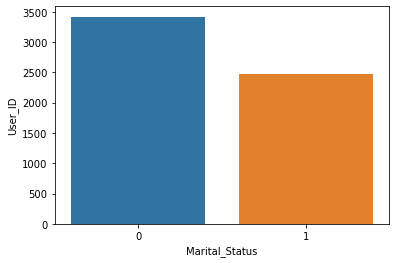

In [21]:
a=df.groupby('Marital_Status')["User_ID"].nunique().reset_index()
sns.barplot(x='Marital_Status',y='User_ID',data=a)

### 58% of the customers are single and 42% are married (Assuming 0 is Single and 1 is Married)

### 3. Age

In [22]:
a=round(df.groupby('Age')["User_ID"].nunique()/df['User_ID'].nunique()*100,2)
a

Age
0-17      3.70
18-25    18.15
26-35    34.85
36-45    19.81
46-50     9.01
51-55     8.16
55+       6.31
Name: User_ID, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='User_ID'>

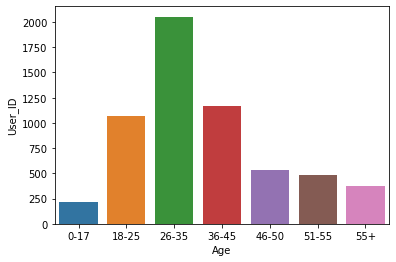

In [23]:
a=df.groupby('Age')["User_ID"].nunique().reset_index()
sns.barplot(x='Age',y='User_ID',data=a)

### Nearly 35% of the customers are in the age group of 26-35. 75% of the customers are in the age groups of 18 to 45.

### 4. City_Category

In [24]:
a=round(df.groupby('City_Category')["User_ID"].nunique()/df['User_ID'].nunique()*100,2)
a

City_Category
A    17.74
B    28.98
C    53.28
Name: User_ID, dtype: float64

<AxesSubplot:xlabel='City_Category', ylabel='User_ID'>

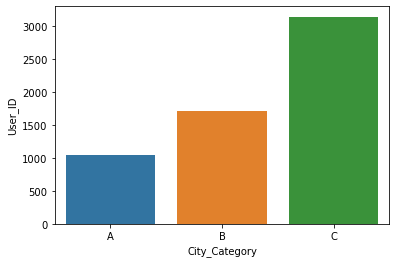

In [25]:
a=df.groupby('City_Category')["User_ID"].nunique().reset_index()
sns.barplot(x='City_Category',y='User_ID',data=a)

### 53% of the customers are from City category C followed by 29% from B and 18% from A

### 5. Stay_In_Current_City_Years

In [26]:
a=round(df.groupby('Stay_In_Current_City_Years')["User_ID"].nunique()/df['User_ID'].nunique()*100,2)
a

Stay_In_Current_City_Years
0     13.10
1     35.41
2     19.44
3     16.62
4+    15.43
Name: User_ID, dtype: float64

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='User_ID'>

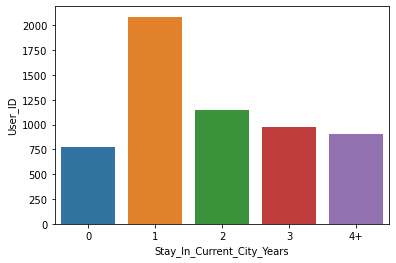

In [27]:
a=df.groupby('Stay_In_Current_City_Years')["User_ID"].nunique().reset_index()
sns.barplot(x='Stay_In_Current_City_Years',y='User_ID',data=a)

### 35% of the customers have been staying in the current city for 1 year. The remaining customers are almost equally distributed among the other categories

### 6. Occupation

In [28]:
a=df.groupby('Occupation')["User_ID"].nunique().sort_values(ascending=False)
a=a[0:5]
a

Occupation
4     740
0     688
7     669
1     517
17    491
Name: User_ID, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='User_ID'>

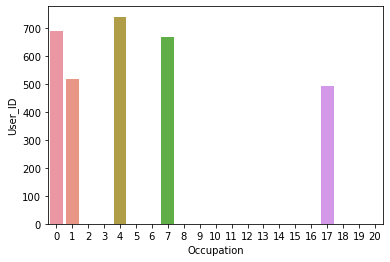

In [29]:
a=a.reset_index()
sns.barplot(x='Occupation',y='User_ID',data=a)

### The top 3 Occupation categories are 4 ,0 and 7

### 7. Product_Category

In [30]:
a=df.groupby('Product_Category')["User_ID"].nunique().sort_values(ascending=False)
a=a[0:5]
a

Product_Category
1    5767
5    5751
8    5659
2    4296
6    4085
Name: User_ID, dtype: int64

<AxesSubplot:xlabel='Product_Category', ylabel='User_ID'>

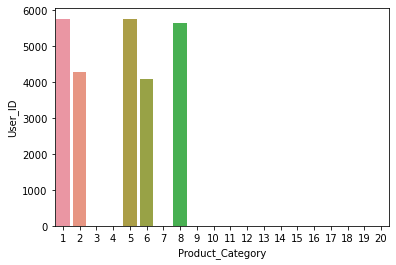

In [31]:
a=a.reset_index()
sns.barplot(x='Product_Category',y='User_ID',data=a)

### The top 3 most sold product categories are 1, 5 and 8

### 8. Purchase

In [32]:
a=df.groupby('User_ID')['Purchase'].sum().reset_index()
a

,User_ID,Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000004,206468
4,1000005,821001
...,...,...
5886,1006036,4116058
5887,1006037,1119538
5888,1006038,90034
5889,1006039,590319


<AxesSubplot:xlabel='Purchase'>

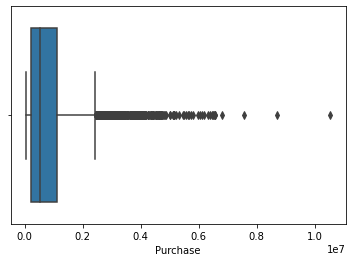

In [33]:
sns.boxplot(data=a, x='Purchase')

In [34]:
a['Purchase'].median()

521213.0

### The median value of purchase per user is 521213 Dollars. 

### Bivariate Analysis

### 1. Gender vs Age

In [35]:
a=df.groupby(['Gender','Age'])['User_ID'].nunique().reset_index()
a.sort_values(by='User_ID',ascending=False)

,Gender,Age,User_ID
9,M,26-35,1508
10,M,36-45,834
8,M,18-25,782
2,F,26-35,545
11,M,46-50,349
12,M,51-55,339
3,F,36-45,333
1,F,18-25,287
13,M,55+,273
4,F,46-50,182


<AxesSubplot:xlabel='Age', ylabel='User_ID'>

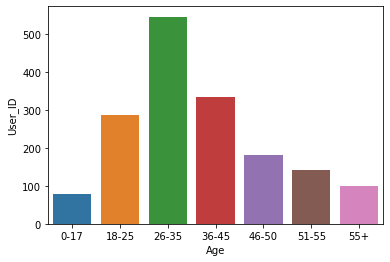

In [36]:
sns.barplot(y='User_ID',x='Age',data=a[a['Gender']=='F'])

<AxesSubplot:xlabel='Age', ylabel='User_ID'>

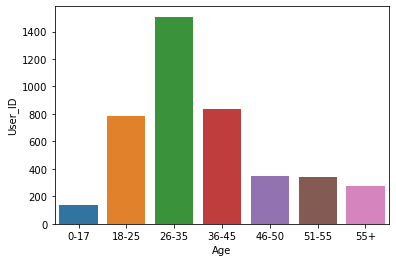

In [37]:
sns.barplot(y='User_ID',x='Age',data=a[a['Gender']=='M'])

### Both Female and Male customers belong mostly to the 26-35 age group, followed by 36-45 and 18-25 groups.

### 2. Gender vs Marital Status

In [38]:
a=df.groupby(['Gender','Marital_Status'])['User_ID'].nunique().reset_index()
a.sort_values(by='User_ID',ascending=False)

,Gender,Marital_Status,User_ID
2,M,0,2470
3,M,1,1755
0,F,0,947
1,F,1,719


<AxesSubplot:xlabel='Marital_Status', ylabel='User_ID'>

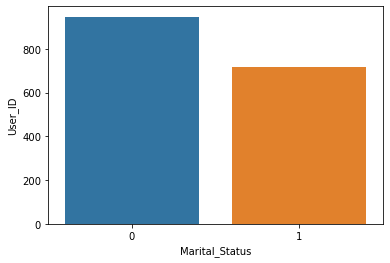

In [39]:
sns.barplot(y='User_ID',x='Marital_Status',data=a[a['Gender']=='F'])

<AxesSubplot:xlabel='Marital_Status', ylabel='User_ID'>

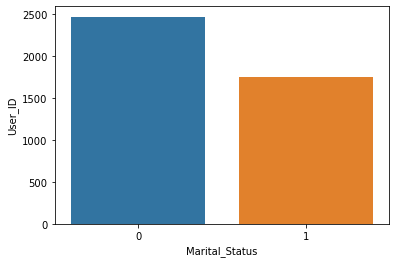

In [40]:
sns.barplot(y='User_ID',x='Marital_Status',data=a[a['Gender']=='M'])

### Both Female and Male categories have more number of single than married customers

### 3. Gender vs City Category

In [41]:
a=df.groupby(['Gender','City_Category'])['User_ID'].nunique().reset_index()
a.sort_values(by='User_ID',ascending=False)

,Gender,City_Category,User_ID
5,M,C,2271
4,M,B,1204
2,F,C,868
3,M,A,750
1,F,B,503
0,F,A,295


<AxesSubplot:xlabel='City_Category', ylabel='User_ID'>

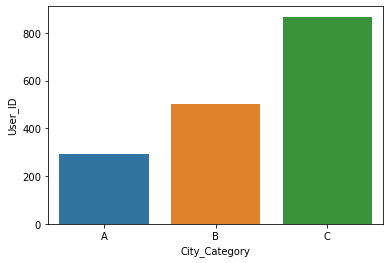

In [42]:
sns.barplot(y='User_ID',x='City_Category',data=a[a['Gender']=='F'])

<AxesSubplot:xlabel='City_Category', ylabel='User_ID'>

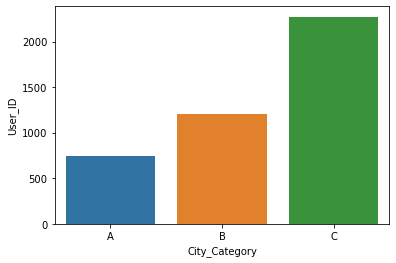

In [43]:
sns.barplot(y='User_ID',x='City_Category',data=a[a['Gender']=='M'])

### Both Female and Male categories have majority in City Category C followed by B and then A

### 4. Purchase vs Gender

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

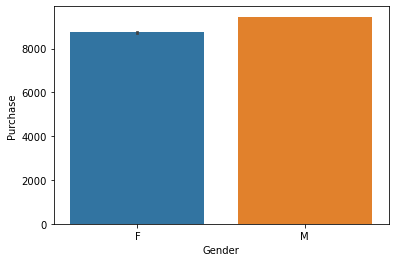

In [69]:
sns.barplot(data=df,x=df['Gender'],y=df['Purchase'])

### The total purchase amount is higher for Males when compared to Females

In [72]:
a=df.groupby(['User_ID','Gender'])['Purchase'].sum().reset_index()
a=a[a['Purchase']!=0]
a

,User_ID,Gender,Purchase
0,1000001,F,334093
3,1000002,M,810472
5,1000003,M,341635
7,1000004,M,206468
9,1000005,M,821001
...,...,...,...
11772,1006036,F,4116058
11774,1006037,F,1119538
11776,1006038,F,90034
11778,1006039,F,590319


In [74]:
a[a['Gender']=='F']['Purchase'].mean()

712024.3949579832

In [63]:
a[a['Gender']=='M']['Purchase'].mean()

925344.4023668639

### There is a difference of about 0.2 Million Dollars in the average spending of men vs women.

### 5. Purchase vs Marital Status

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

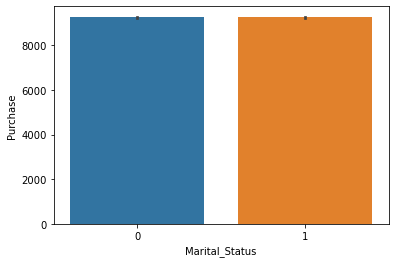

In [75]:
sns.barplot(data=df,x=df['Marital_Status'],y=df['Purchase'])

### The total Purchase amount is almost the same for both married and single customers

### 6. Purchase vs City Category

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

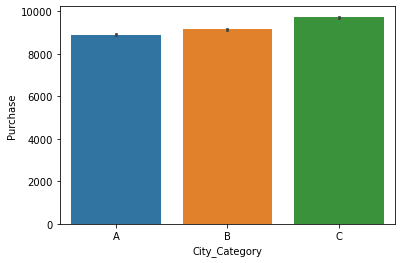

In [76]:
sns.barplot(data=df,x=df['City_Category'],y=df['Purchase'])

### City Category C has a higher total Purchase amount compared to A and B

### 7. Purchase vs Stay In Current City

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

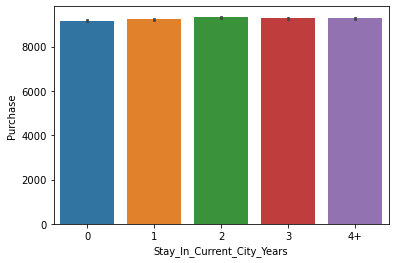

In [78]:
sns.barplot(data=df,y=df['Purchase'],x=df['Stay_In_Current_City_Years'])

### The total Purchase amount is almost equally split across various categories of number of years of stay in the city

### 8. Purchase vs Occupation

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

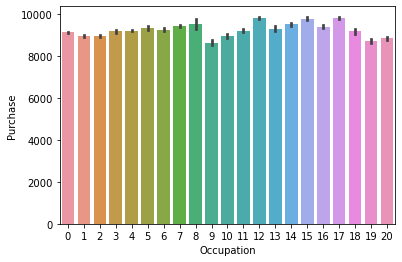

In [79]:
sns.barplot(data=df,y=df['Purchase'],x=df['Occupation'])

### The purchase amount is observed to be slightly higher in Occupation categories 12, 15 and 17

### 9. Purchase vs Product Category

<AxesSubplot:xlabel='Product_Category', ylabel='Purchase'>

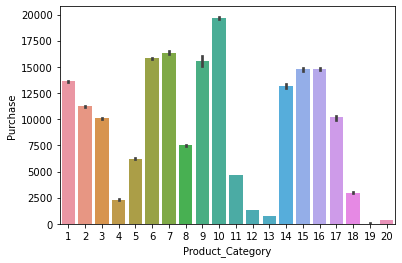

In [80]:
sns.barplot(data=df,y=df['Purchase'],x=df['Product_Category'])

### Product Category 10 has the highest total purchase amount followed by 7 and 6. Categories like 19, 20 and 13 have the lowest total purchase values

### 2. Missing Value and Outlier Detection

In [ ]:
df.isnull().sum()

### There are no missing values in any columns of the dataset

In [ ]:
df.describe()

In [82]:
# Visualize outliers using statistical methods 
# Purchase Column
a=df.groupby('User_ID')['Purchase'].sum().reset_index()
a

,User_ID,Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000004,206468
4,1000005,821001
...,...,...
5886,1006036,4116058
5887,1006037,1119538
5888,1006038,90034
5889,1006039,590319


Text(0.5, 1.0, 'Distribution of Purchase')

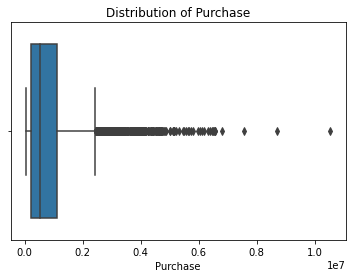

In [83]:
sns.boxplot(data=a,x=a["Purchase"])
plt.title('Distribution of Purchase')

In [85]:
# Detect outlier values using statistical methods
q1=np.percentile(a["Purchase"],25)
q2=np.percentile(a["Purchase"],75)
IQR=q2-q1
outliers =a[(a["Purchase"]<(q1-1.5*IQR)) | (a["Purchase"]>(q2 + 1.5*IQR))]["Purchase"]
outliers.value_counts()

2788504    1
2512923    1
2808359    1
2772580    1
3105976    1
          ..
2608735    1
3212202    1
2445649    1
4358776    1
4116058    1
Name: Purchase, Length: 409, dtype: int64

In [86]:
outliers.value_counts().sum()

409

### There are 409 outlier values in the Purchase column

### 3.	Business Insights based on Non- Graphical and Visual Analysis 

### 1. The dataset includes Male and Female customers, both Married and Single
### 2. There are 5891 unique customers in the dataset and 3631 unique products
### 3. The dataset includes 72% Males and 28% Females
### 4. 58% of the customers are single and 42% are married (Assuming 0 is Single and 1 is Married)
### 5. Nearly 35% of the customers are in the age group of 26-35. 75% of the customers are in the age groups of 18 to 45.
### 6. 53% of the customers are from City category C followed by 29% from B and 18% from A
### 7. 35% of the customers have been staying in the current city for 1 year. The remaining customers are almost equally distributed among the other categories
### 8. The top 3 Occupation categories are 4 ,0 and 7
### 9. The top 3 most sold product categories are 1, 5 and 8
### 10. The median value of purchase per user is 521213 Dollars.
### 11. Both Female and Male customers belong mostly to the 26-35 age group, followed by 36-45 and 18-25 groups.
### 12. Both Female and Male categories have more number of single than married customers
### 13. Both Female and Male categories have majority in City Category C followed by B and then A
### 14. Males have purchased for a higher amount than females. 
### 15. There is a difference of about 0.2 Million Dollars in the average spending of men vs women.
### 16. The total Purchase amount is almost the same for both married and single customers
### 17. City Category C has a higher total Purchase amount compared to A and B
### 18. The total Purchase amount is almost equally split across various categories of number of years of stay in the city
### 19. The purchase amount is observed to be slightly higher in Occupation categories 12, 15 and 17
### 20. Product Category 10 has the highest total purchase amount followed by 7 and 6. Categories like 19, 20 and 13 have the lowest total purchase values. Categories 5 and 8 have higher number of purchases but their contribution to total purchase amount is less. They seem to be the products that are popular and with lower MRP.



### 4. Answering Questions

### 1.	Are women spending more money per transaction than men?

In [99]:
# Calculating total purchase per user id
df_gender=df.groupby(['User_ID','Gender'])['Purchase'].sum().reset_index()
df_gender=df_gender[df_gender['Purchase']!=0]
df_gender

,User_ID,Gender,Purchase
0,1000001,F,334093
3,1000002,M,810472
5,1000003,M,341635
7,1000004,M,206468
9,1000005,M,821001
...,...,...,...
11772,1006036,F,4116058
11774,1006037,F,1119538
11776,1006038,F,90034
11778,1006039,F,590319


In [100]:
mean_women=df_gender[df_gender['Gender']=='F']['Purchase'].mean()
mean_women

712024.3949579832

In [101]:
mean_men=df_gender[df_gender['Gender']=='M']['Purchase'].mean()
mean_men

925344.4023668639

In [102]:
mean_men-mean_women

213320.00740888075

### The mean purchase amount is more for men than women by 0.2 Million Dollars.  

### 2.	Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [103]:
# Finding total number of males and females in the dataset
df_gender['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

#### Considering the total number of men and women,  sample sizes of 200, 400 and 700 are being considered for observation

### Bootstrapping with Sample size = 200

#### Female

In [113]:
# Dataframe with data for Females
df_female=df_gender[df_gender['Gender']=='F']
df_female

,User_ID,Gender,Purchase
0,1000001,F,334093
10,1000006,F,379930
18,1000010,F,2169510
20,1000011,F,557023
30,1000016,F,150490
...,...,...,...
11770,1006035,F,956645
11772,1006036,F,4116058
11774,1006037,F,1119538
11776,1006038,F,90034


In [119]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_female=[]
n = 200
for i in range(10000):
    samples=np.random.choice(df_female['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_female.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_Female')

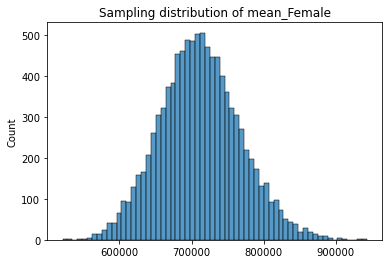

In [120]:
sns.histplot(bootstrapped_mean_female)
plt.title('Sampling distribution of mean_Female')

#### Male

In [116]:
# Dataframe with data for Males
df_male=df_gender[df_gender['Gender']=='M']
df_male

,User_ID,Gender,Purchase
3,1000002,M,810472
5,1000003,M,341635
7,1000004,M,206468
9,1000005,M,821001
13,1000007,M,234668
...,...,...,...
11761,1006030,M,737361
11765,1006032,M,517261
11767,1006033,M,501843
11769,1006034,M,197086


In [121]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_male=[]
n = 200
for i in range(10000):
    samples=np.random.choice(df_male['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_male.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_Male')

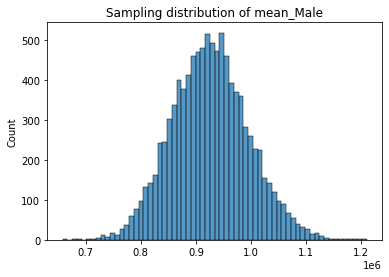

In [122]:
sns.histplot(bootstrapped_mean_male)
plt.title('Sampling distribution of mean_Male')

### Bootstrapping with Sample size = 1000

#### Single

In [104]:
# Dataframe with data for Females
df_female=df_gender[df_gender['Gender']=='F']
df_female

,User_ID,Gender,Purchase
0,1000001,F,334093
10,1000006,F,379930
18,1000010,F,2169510
20,1000011,F,557023
30,1000016,F,150490
...,...,...,...
11770,1006035,F,956645
11772,1006036,F,4116058
11774,1006037,F,1119538
11776,1006038,F,90034


In [107]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_female=[]
n = 400
for i in range(10000):
    samples=np.random.choice(df_female['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_female.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_Female')

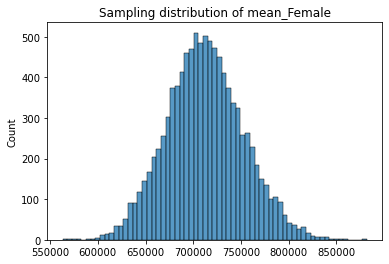

In [109]:
sns.histplot(bootstrapped_mean_female)
plt.title('Sampling distribution of mean_Female')

#### Male

In [110]:
# Dataframe with data for Males
df_male=df_gender[df_gender['Gender']=='M']
df_male

,User_ID,Gender,Purchase
3,1000002,M,810472
5,1000003,M,341635
7,1000004,M,206468
9,1000005,M,821001
13,1000007,M,234668
...,...,...,...
11761,1006030,M,737361
11765,1006032,M,517261
11767,1006033,M,501843
11769,1006034,M,197086


In [111]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_male=[]
n = 400
for i in range(10000):
    samples=np.random.choice(df_male['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_male.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_Male')

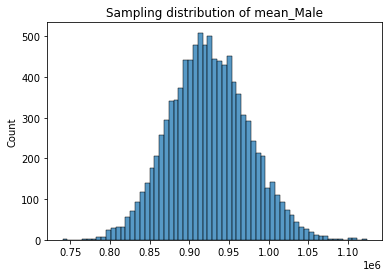

In [112]:
sns.histplot(bootstrapped_mean_male)
plt.title('Sampling distribution of mean_Male')

### Bootstrapping with Sample size = 700

#### Female

In [113]:
# Dataframe with data for Females
df_female=df_gender[df_gender['Gender']=='F']
df_female

,User_ID,Gender,Purchase
0,1000001,F,334093
10,1000006,F,379930
18,1000010,F,2169510
20,1000011,F,557023
30,1000016,F,150490
...,...,...,...
11770,1006035,F,956645
11772,1006036,F,4116058
11774,1006037,F,1119538
11776,1006038,F,90034


In [114]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_female=[]
n = 700
for i in range(10000):
    samples=np.random.choice(df_female['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_female.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_Female')

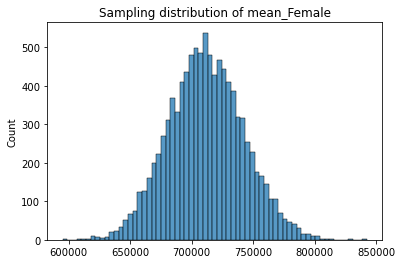

In [115]:
sns.histplot(bootstrapped_mean_female)
plt.title('Sampling distribution of mean_Female')

#### Male

In [116]:
# Dataframe with data for Males
df_male=df_gender[df_gender['Gender']=='M']
df_male

,User_ID,Gender,Purchase
3,1000002,M,810472
5,1000003,M,341635
7,1000004,M,206468
9,1000005,M,821001
13,1000007,M,234668
...,...,...,...
11761,1006030,M,737361
11765,1006032,M,517261
11767,1006033,M,501843
11769,1006034,M,197086


In [117]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_male=[]
n = 700
for i in range(10000):
    samples=np.random.choice(df_male['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_male.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_Male')

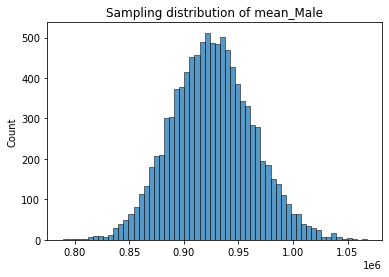

In [118]:
sns.histplot(bootstrapped_mean_male)
plt.title('Sampling distribution of mean_Male')

### The sampling distribution has much less variance when sample size is changed to 400 from 200. When sample size is 700, the variance sees a small decrease. Hence the sample size is fixed as 700 for further calculations. 

### Confidence Interval at 90% Confidence

In [128]:
# Calculating Confidence Interval for Females
upper_female=np.percentile(bootstrapped_mean_female,95)
upper_female

807312.3659999998

In [129]:
lower_female=np.percentile(bootstrapped_mean_female,5)
lower_female

622034.5765

In [130]:
# Calculating Confidence Interval for Males
upper_male=np.percentile(bootstrapped_mean_male,95)
upper_male

1044020.183

In [131]:
lower_male=np.percentile(bootstrapped_mean_male,5)
lower_male

813655.92825

### At 90% confidence the CI for Females is [622035, 807312] and for Males is [813656, 1044020]. There is no overlap observed. 

### Confidence Interval at 95% Confidence

In [132]:
# Calculating Confidence Interval for Females
upper_female=np.percentile(bootstrapped_mean_female,97.5)
upper_female

827204.3815

In [133]:
lower_female=np.percentile(bootstrapped_mean_female,2.5)
lower_female

605642.46725

In [134]:
# Calculating Confidence Interval for Males
upper_male=np.percentile(bootstrapped_mean_male,97.5)
upper_male

1067461.103625

In [135]:
lower_male=np.percentile(bootstrapped_mean_male,2.5)
lower_male

794555.94875

### At 95% confidence the CI for Females is [605642, 827204] and for Males is [794555, 1067461]. There is overlap observed. 

### 3. Are confidence intervals of average male and female spending overlapping? How can the client leverage this conclusion to make changes or improvements? 

### It is observed that at 90% confidence, there is no overlap between the Confidence Intervals of Females and Males. This helps in concluding that the average purchase amount of Females is less than Males. They can focus on offers 

### 4. Results when the same activity is performed for Married vs Unmarried

In [144]:
# Calculating total purchase per user id
df_marital=df.groupby(['User_ID','Marital_Status'])['Purchase'].sum().reset_index()
df_marital=df_marital[df_marital['Purchase']!=0]
df_marital

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
2,1000002,0,810472
4,1000003,0,341635
7,1000004,1,206468
9,1000005,1,821001
...,...,...,...
11773,1006036,1,4116058
11774,1006037,0,1119538
11776,1006038,0,90034
11779,1006039,1,590319


In [145]:
mean_single=df_marital[df_marital['Marital_Status']==0]['Purchase'].mean()
mean_single

880575.7819724905

In [146]:
mean_married=df_marital[df_marital['Marital_Status']==1]['Purchase'].mean()
mean_married

843526.7966855295

In [147]:
mean_single-mean_married

37048.98528696096

### The mean purchase amount is more for single than married by a mere 37049 Dollars.  

### 2.	Confidence intervals and distribution of the mean of the expenses by single and married customers 

In [148]:
# Finding total number of single and married users in the dataset
df_marital['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

#### Considering the total number of men and women,  sample sizes of 700 and 1000 are being considered for observation

### Bootstrapping with Sample size = 700

#### Single

In [149]:
# Dataframe with data for Single customers
df_single=df_marital[df_marital['Marital_Status']==0]
df_single

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
2,1000002,0,810472
4,1000003,0,341635
10,1000006,0,379930
16,1000009,0,594099
...,...,...,...
11768,1006034,0,197086
11770,1006035,0,956645
11774,1006037,0,1119538
11776,1006038,0,90034


In [150]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_single=[]
n = 700
for i in range(10000):
    samples=np.random.choice(df_single['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_single.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_Single')

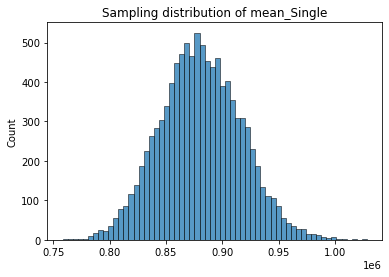

In [151]:
sns.histplot(bootstrapped_mean_single)
plt.title('Sampling distribution of mean_Single')

#### 18-25

In [152]:
# Dataframe with data for Married customers
df_married=df_marital[df_marital['Marital_Status']==1]
df_married

,User_ID,Marital_Status,Purchase
7,1000004,1,206468
9,1000005,1,821001
13,1000007,1,234668
15,1000008,1,796593
19,1000010,1,2169510
...,...,...,...
11759,1006029,1,157436
11761,1006030,1,737361
11767,1006033,1,501843
11773,1006036,1,4116058


In [153]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_married=[]
n = 700
for i in range(10000):
    samples=np.random.choice(df_married['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_married.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_Married')

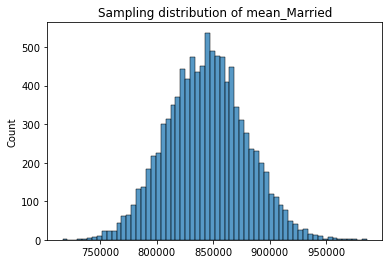

In [154]:
sns.histplot(bootstrapped_mean_married)
plt.title('Sampling distribution of mean_Married')

### Bootstrapping with Sample size = 1000

#### Single

In [149]:
# Dataframe with data for Single customers
df_single=df_marital[df_marital['Marital_Status']==0]
df_single

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
2,1000002,0,810472
4,1000003,0,341635
10,1000006,0,379930
16,1000009,0,594099
...,...,...,...
11768,1006034,0,197086
11770,1006035,0,956645
11774,1006037,0,1119538
11776,1006038,0,90034


In [155]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_single=[]
n = 1000
for i in range(10000):
    samples=np.random.choice(df_single['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_single.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_Single')

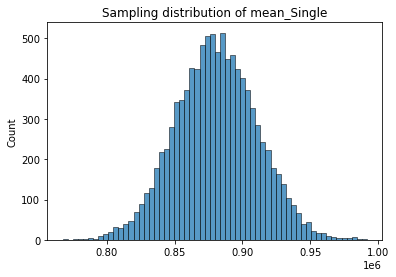

In [156]:
sns.histplot(bootstrapped_mean_single)
plt.title('Sampling distribution of mean_Single')

#### Married

In [152]:
# Dataframe with data for Married customers
df_married=df_marital[df_marital['Marital_Status']==1]
df_married

,User_ID,Marital_Status,Purchase
7,1000004,1,206468
9,1000005,1,821001
13,1000007,1,234668
15,1000008,1,796593
19,1000010,1,2169510
...,...,...,...
11759,1006029,1,157436
11761,1006030,1,737361
11767,1006033,1,501843
11773,1006036,1,4116058


In [157]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_married=[]
n = 1000
for i in range(10000):
    samples=np.random.choice(df_married['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_married.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_Married')

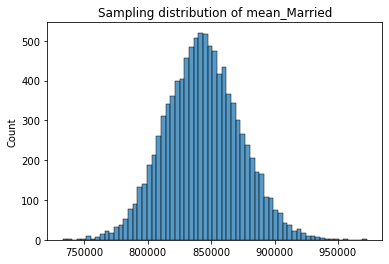

In [158]:
sns.histplot(bootstrapped_mean_married)
plt.title('Sampling distribution of mean_Married')

### The sampling distribution has a slightly less variance when sample size is changed to 1000 from 700. Hence the sample size is fixed as 1000 for further calculations. 

### Confidence Interval at 90% Confidence

In [159]:
# Calculating Confidence Interval for Single
upper_single=np.percentile(bootstrapped_mean_single,95)
upper_single

930640.2166

In [160]:
lower_single=np.percentile(bootstrapped_mean_single,5)
lower_single

831734.00815

In [161]:
# Calculating Confidence Interval for Males
upper_married=np.percentile(bootstrapped_mean_married,95)
upper_married

892767.6187

In [162]:
lower_married=np.percentile(bootstrapped_mean_married,5)
lower_married

795780.60445

### At 90% confidence the CI for Single customers is [831734, 930640] and for Married customers is [795781, 892768]. There is overlap observed. 

### It is observed that at 90% confidence, there is overlap between the Confidence Intervals of Single and Married customers. There is no statistically significant difference observed in the purchase patterns of single and married customers. 

### 4. Results when the same activity is performed for Age

In [167]:
# Calculating total purchase per user id
df_age=df.groupby(['User_ID','Age'])['Purchase'].sum().reset_index()
df_age=df_age[df_age['Purchase']!=0]
df_age

,User_ID,Age,Purchase
0,1000001,0-17,334093
13,1000002,55+,810472
16,1000003,26-35,341635
25,1000004,46-50,206468
30,1000005,26-35,821001
...,...,...,...
41204,1006036,26-35,4116058
41213,1006037,46-50,1119538
41222,1006038,55+,90034
41227,1006039,46-50,590319


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

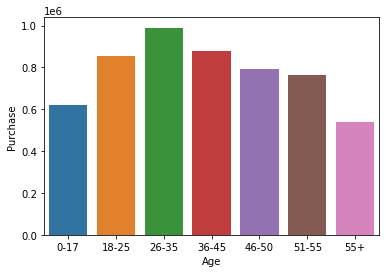

In [172]:
a=df_age.groupby('Age')['Purchase'].mean().reset_index()
sns.barplot(data=a,x=a['Age'],y=a['Purchase'])

### The average purchase amount is the highest for 26-35 age group followed by 36-45 and 18-25. The average purchase amount is least for 55+ group

### 2.	Confidence intervals and distribution of the mean of the expenses by customers of different age groups

In [168]:
# Finding totalcustomers in each age group in the dataset
df_age['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

#### Considering the total number of men and women,  sample sizes of 200 is being considered for observation

### Bootstrapping with Sample size = 100

#### 0-17

In [173]:
# Dataframe with data for 0-17 age group
df_0=df_age[df_age['Age']=='0-17']
df_0

,User_ID,Age,Purchase
0,1000001,0-17,334093
126,1000019,0-17,1458069
336,1000051,0-17,200772
504,1000075,0-17,1035584
581,1000086,0-17,294063
...,...,...,...
39872,1005844,0-17,476231
40621,1005953,0-17,629161
40761,1005973,0-17,270475
40873,1005989,0-17,466195


In [179]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_0=[]
n = 200
for i in range(10000):
    samples=np.random.choice(df_0['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_0.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_0-17')

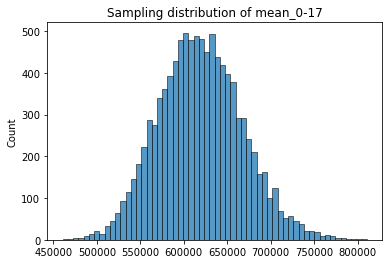

In [180]:
sns.histplot(bootstrapped_mean_0)
plt.title('Sampling distribution of mean_0-17')

#### 18-25

In [176]:
# Dataframe with data for 18-25 age group
df_18=df_age[df_age['Age']=='18-25']
df_18

,User_ID,Age,Purchase
120,1000018,18-25,1979047
141,1000021,18-25,127099
148,1000022,18-25,1279914
169,1000025,18-25,534706
232,1000034,18-25,807983
...,...,...,...
40937,1005998,18-25,702901
41007,1006008,18-25,266306
41140,1006027,18-25,265201
41147,1006028,18-25,362972


In [181]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_18=[]
n = 200
for i in range(10000):
    samples=np.random.choice(df_18['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_18.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_18-25')

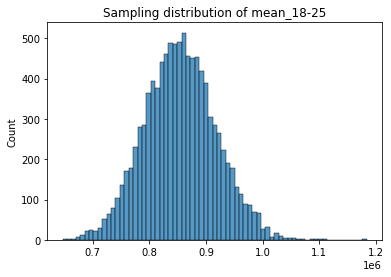

In [182]:
sns.histplot(bootstrapped_mean_18)
plt.title('Sampling distribution of mean_18-25')

#### 26-35

In [183]:
# Dataframe with data for 26-35 age group
df_26=df_age[df_age['Age']=='26-35']
df_26

,User_ID,Age,Purchase
16,1000003,26-35,341635
30,1000005,26-35,821001
51,1000008,26-35,796593
58,1000009,26-35,594099
72,1000011,26-35,557023
...,...,...,...
41162,1006030,26-35,737361
41190,1006034,26-35,197086
41197,1006035,26-35,956645
41204,1006036,26-35,4116058


In [184]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_26=[]
n = 200
for i in range(10000):
    samples=np.random.choice(df_26['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_26.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_26-35')

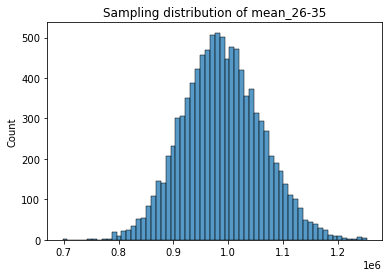

In [185]:
sns.histplot(bootstrapped_mean_26)
plt.title('Sampling distribution of mean_26-35')

#### 36-45

In [186]:
# Dataframe with data for 36-45 age group
df_36=df_age[df_age['Age']=='36-45']
df_36

,User_ID,Age,Purchase
45,1000007,36-45,234668
66,1000010,36-45,2169510
94,1000014,36-45,127629
108,1000016,36-45,150490
157,1000023,36-45,1670998
...,...,...,...
41030,1006011,36-45,1198714
41037,1006012,36-45,127920
41072,1006017,36-45,160230
41079,1006018,36-45,975585


In [187]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_36=[]
n = 200
for i in range(10000):
    samples=np.random.choice(df_36['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_36.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_36-45')

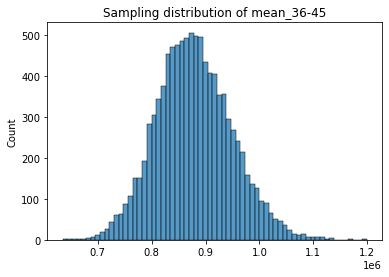

In [188]:
sns.histplot(bootstrapped_mean_36)
plt.title('Sampling distribution of mean_36-45')

#### 46-50

In [189]:
# Dataframe with data for 46-50 age group
df_46=df_age[df_age['Age']=='46-50']
df_46

,User_ID,Age,Purchase
25,1000004,46-50,206468
88,1000013,46-50,713927
228,1000033,46-50,1940418
242,1000035,46-50,821303
291,1000044,46-50,1180380
...,...,...,...
41052,1006014,46-50,528238
41066,1006016,46-50,3770970
41178,1006032,46-50,517261
41213,1006037,46-50,1119538


In [190]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_46=[]
n = 200
for i in range(10000):
    samples=np.random.choice(df_46['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_46.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_46-50')

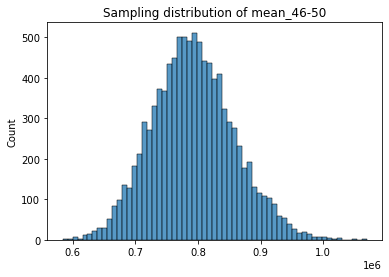

In [191]:
sns.histplot(bootstrapped_mean_46)
plt.title('Sampling distribution of mean_46-50')

#### 51-55

In [192]:
# Dataframe with data for 51-55 age group
df_51=df_age[df_age['Age']=='51-55']
df_51

,User_ID,Age,Purchase
40,1000006,51-55,379930
117,1000017,51-55,1425995
362,1000054,51-55,187451
397,1000059,51-55,980118
404,1000060,51-55,280029
...,...,...,...
40724,1005967,51-55,136189
40906,1005993,51-55,130022
40969,1006002,51-55,1843460
41095,1006020,51-55,374475


In [193]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_51=[]
n = 200
for i in range(10000):
    samples=np.random.choice(df_51['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_51.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_51-55')

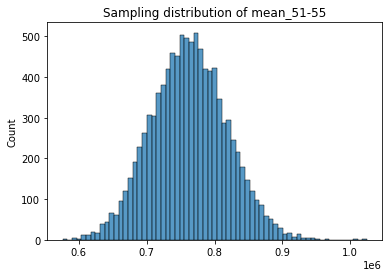

In [194]:
sns.histplot(bootstrapped_mean_51)
plt.title('Sampling distribution of mean_51-55')

#### 55+

In [195]:
# Dataframe with data for 55+ age group
df_55=df_age[df_age['Age']=='55+']
df_55

,User_ID,Age,Purchase
13,1000002,55+,810472
216,1000031,55+,496154
545,1000080,55+,339364
608,1000089,55+,112276
615,1000090,55+,1310621
...,...,...,...
40592,1005948,55+,2120730
40732,1005968,55+,282354
40816,1005980,55+,1070641
40858,1005986,55+,606283


In [196]:
# Initiating an empty list to store mean values of each sample
bootstrapped_mean_55=[]
n = 200
for i in range(10000):
    samples=np.random.choice(df_55['Purchase'],size=n)
    sample_mean=np.mean(samples)
    bootstrapped_mean_55.append(sample_mean)

Text(0.5, 1.0, 'Sampling distribution of mean_55+')

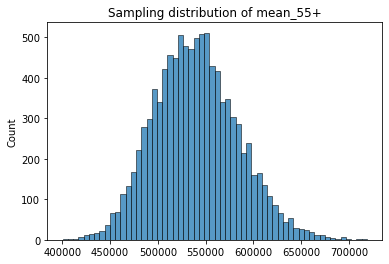

In [197]:
sns.histplot(bootstrapped_mean_55)
plt.title('Sampling distribution of mean_55+')